In [7]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# Load the dataset
df = pd.read_csv('titanic.csv')

<Axes: ylabel='Frequency'>

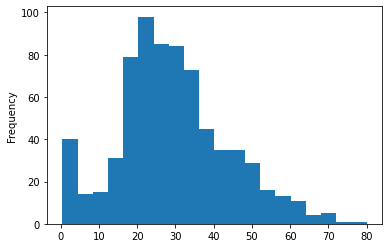

In [9]:
# Univariate Analysis
# Example: Histogram of age distribution
df['age'].plot(kind='hist', bins=20)

<Axes: xlabel='survived', ylabel='fare'>

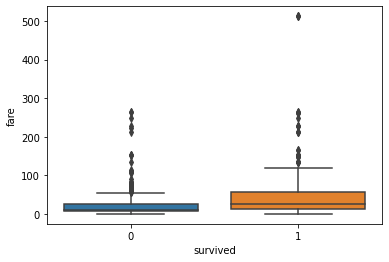

In [10]:
# Bivariate Analysis
# Example: Box plot of fare vs. survival
sns.boxplot(x='survived', y='fare', data=df)

<Axes: >

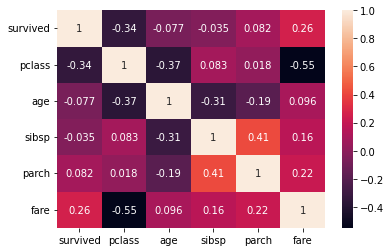

In [11]:
# Multivariate Analysis
# Example: Heatmap of correlation matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True)

In [12]:
# Descriptive statistics
summary_stats = df.describe()

In [13]:
# Handle missing values
# Example: Fill missing age values with the median
df['age'].fillna(df['age'].median(), inplace=True)

In [14]:
# 6.Find and replace outliers
# Example: Replace fare outliers with the median fare value
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[(df['fare'] < lower_bound) | (df['fare'] > upper_bound), 'fare'] = df['fare'].median()

In [15]:
# Check for categorical columns and perform encoding
# Example: One-hot encoding for the 'sex' column
encoded_df = pd.get_dummies(df, columns=['sex'])

In [16]:
# Split the data into dependent and independent variables
X = encoded_df.drop('survived', axis=1)
y = encoded_df['survived']

In [17]:
# Exclude categorical columns from scaling
cols_to_scale = [col for col in X.columns if col not in ['embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']]
X_scaled = X[cols_to_scale]
# Scale the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [18]:
# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)